<a href="https://colab.research.google.com/github/aksanaboo/sephora/blob/main/SephoraEDApart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
#datasets
product = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/product_info.csv')
review_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews_0-250.csv')
review_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews_250-500.csv')
review_3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews_500-750.csv')
review_4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews_750-1250.csv')
review_5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews_1250-end.csv')

<ipython-input-3-e4867818210a>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  review_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews_0-250.csv')
<ipython-input-3-e4867818210a>:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  review_4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews_750-1250.csv')
<ipython-input-3-e4867818210a>:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  review_5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews_1250-end.csv')


In [4]:
review_1.shape

(602130, 19)

In [5]:
df = [review_1,review_2,review_3,review_4,review_5]

In [6]:
#concat all reviews into one df
review = pd.concat(df,axis=0)

In [7]:
review.shape

(1094411, 19)

In [8]:
review.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [9]:
#check for missing values
review.isnull().sum()

Unnamed: 0                       0
author_id                        0
rating                           0
is_recommended              167988
helpfulness                 561592
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                   1444
review_title                310654
skin_tone                   170539
eye_color                   209628
skin_type                   111557
hair_color                  226768
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
dtype: int64

In [10]:
#check for duplicates
review.duplicated().sum()

0

In [11]:
rev = review[['product_name','brand_name','review_text','review_title','price_usd']]

In [12]:
rev.isnull().sum()

product_name         0
brand_name           0
review_text       1444
review_title    310654
price_usd            0
dtype: int64

In [13]:
rev = rev.dropna(subset=['review_text'])
rev = rev.reset_index(drop=True)

In [14]:
rev.fillna(' ', inplace=True)

In [15]:
rev.isnull().sum()

product_name    0
brand_name      0
review_text     0
review_title    0
price_usd       0
dtype: int64

In [16]:
rev.shape

(1092967, 5)

In [17]:
rev.head()

,product_name,brand_name,review_text,review_title,price_usd
0,Gentle Hydra-Gel Face Cleanser,NUDESTIX,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,19.0
1,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,I bought this lip mask after reading the revie...,Disappointed,24.0
2,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,My review title says it all! I get so excited ...,New Favorite Routine,24.0
3,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,I’ve always loved this formula for a long time...,Can't go wrong with any of them,24.0
4,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,"If you have dry cracked lips, this is a must h...",A must have !!!,24.0


In [18]:
rev['post'] = rev['review_text'] + rev['review_title']

In [19]:
rev.head()

,product_name,brand_name,review_text,review_title,price_usd,post
0,Gentle Hydra-Gel Face Cleanser,NUDESTIX,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,19.0,I use this with the Nudestix “Citrus Clean Bal...
1,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,I bought this lip mask after reading the revie...,Disappointed,24.0,I bought this lip mask after reading the revie...
2,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,My review title says it all! I get so excited ...,New Favorite Routine,24.0,My review title says it all! I get so excited ...
3,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,I’ve always loved this formula for a long time...,Can't go wrong with any of them,24.0,I’ve always loved this formula for a long time...
4,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,"If you have dry cracked lips, this is a must h...",A must have !!!,24.0,"If you have dry cracked lips, this is a must h..."


In [20]:
##Sentiment Analysis
!pip install textblob

In [21]:
stopword=set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
rev["post"] = rev["post"].apply(clean)

In [24]:
rev.head()

,product_name,brand_name,review_text,review_title,price_usd,post
0,Gentle Hydra-Gel Face Cleanser,NUDESTIX,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,19.0,use nudestix “citrus clean balm makeup melt“ ...
1,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,I bought this lip mask after reading the revie...,Disappointed,24.0,bought lip mask read review hype unfortun meet...
2,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,My review title says it all! I get so excited ...,New Favorite Routine,24.0,review titl say get excit get bed appli lip ma...
3,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,I’ve always loved this formula for a long time...,Can't go wrong with any of them,24.0,i'v alway love formula long time honest don't ...
4,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,"If you have dry cracked lips, this is a must h...",A must have !!!,24.0,dri crack lip must week use learn alway bedsid...


In [25]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
rev["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in rev["post"]]
rev["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in rev["post"]]
rev["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in rev["post"]]
sentiment = rev[["post", "Positive", "Negative", "Neutral"]]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [26]:
rev.head()

,product_name,brand_name,review_text,review_title,price_usd,post,Positive,Negative,Neutral
0,Gentle Hydra-Gel Face Cleanser,NUDESTIX,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,19.0,use nudestix “citrus clean balm makeup melt“ ...,0.181,0.040,0.779
1,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,I bought this lip mask after reading the revie...,Disappointed,24.0,bought lip mask read review hype unfortun meet...,0.162,0.000,0.838
2,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,My review title says it all! I get so excited ...,New Favorite Routine,24.0,review titl say get excit get bed appli lip ma...,0.075,0.097,0.829
3,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,I’ve always loved this formula for a long time...,Can't go wrong with any of them,24.0,i'v alway love formula long time honest don't ...,0.379,0.074,0.548
4,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,"If you have dry cracked lips, this is a must h...",A must have !!!,24.0,dri crack lip must week use learn alway bedsid...,0.095,0.000,0.905


In [27]:
# overall review score on Sephora
Positive = sum(sentiment['Positive'])
Negative = sum(sentiment['Negative'])
Neutral = sum(sentiment['Neutral'])

In [28]:
sentiments = ['Positive', 'Negative', 'Neutral']
values = [Positive, Negative, Neutral]

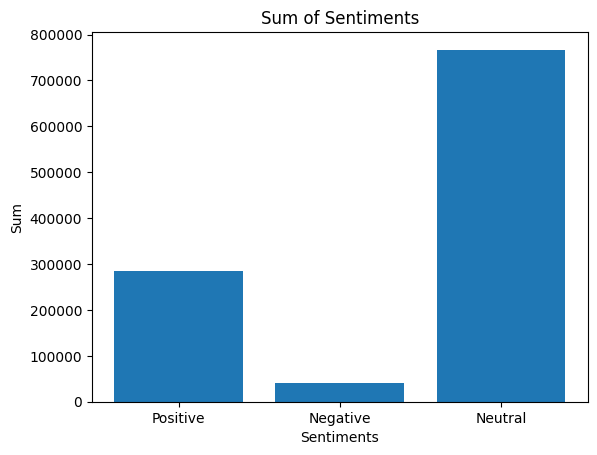

In [31]:
plt.bar(sentiments, values)
plt.xlabel('Sentiments')
plt.ylabel('Sum')
plt.title('Sum of Sentiments')
plt.show()